In [3]:
import pandas as pd
import numpy as np

#Graphiques
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as gp
import matplotlib.pyplot as plt

#Statistiques
from scipy.stats import chi2_contingency

# Machine Learning
from sklearn.cluster import KMeans
import sklearn.preprocessing as preproc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

In [2]:
input_path = "./01_Input_Data"
output_path = "./2_outputs"

importation des données

In [3]:
path =input_path + '/bank-additional-full.csv'
data_set = pd.read_csv(path,sep=";",decimal=".")
data_set=data_set.drop(columns=['duration'])

In [4]:
# Vérifier si des valeurs NaN sont présentes
if data_set.isnull().values.any():
    print("Le dataset contient des valeurs NaN.")
else:
    print("Le dataset ne contient pas de valeurs NaN.")

# Pour voir combien de NaN par colonne
print("Nombre de NaN par colonne :")
# print(data_set.isnull().sum())

Le dataset ne contient pas de valeurs NaN.
Nombre de NaN par colonne :


In [5]:
data_set.tail()
# data_set.info()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


*fonction qui renvoi un tableau avec les types de variables*

In [6]:

def classifier_variables(data_set):
    # Initialisation des listes
    variables_na = []
    variables_numeriques = []
    variables_01 = []
    variables_categorielles = []

    # Parcourir les colonnes du dataset
    for colu in data_set.columns:
        # Vérifier si la colonne contient des valeurs NaN
        if data_set[colu].isna().any():
            variables_na.append(colu)
        else:
            # Vérifier si la colonne est de type numérique
            if data_set[colu].dtype in ["int32", "int64", "float32", "float64"]:
                # Vérifier si la colonne est binaire (deux valeurs uniques)
                if len(data_set[colu].unique()) == 2:
                    variables_01.append(colu)
                else:
                    variables_numeriques.append(colu)
            else:
                # Gérer les colonnes non numériques
                if len(data_set[colu].unique()) == 2:
                    variables_01.append(colu)
                else:
                    variables_categorielles.append(colu)

    # Création du dictionnaire des résultats
    resultat = {
        "variables_na": variables_na,
        "variables_numeriques": variables_numeriques,
        "variables_binaires": variables_01,
        "variables_categorielles": variables_categorielles
    }

    return resultat

# Exemple d'utilisation
variables= classifier_variables(data_set)
print(variables)
data_set.tail()

{'variables_na': [], 'variables_numeriques': ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], 'variables_binaires': ['contact', 'y'], 'variables_categorielles': ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']}


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:

def count(value,data=data_set):
    # Compter le nombre de fois où value apparaît par colonne
    counts = (data == value).sum()

    # Afficher uniquement les colonnes où value est présent
    counts = counts[counts > 0]

    print(f"Nombre de modalités {value} par colonne :")
    print(counts)
    
# Exemple d'utilisation

count("unknown")
count("nonexistent")
count(999)

count("yes",data=data_set['default'])



print(data_set.shape)


Nombre de modalités unknown par colonne :
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64
Nombre de modalités nonexistent par colonne :
poutcome    35563
dtype: int64
Nombre de modalités 999 par colonne :
pdays    39673
dtype: int64
Nombre de modalités yes par colonne :
[3]
(41188, 20)


tracer des histogrammes

In [8]:
# data_set.set_index('y', inplace=True)
# data_set.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
# data_set.plot()
# data_set.plot.box()
# axs = data_set.plot.area(figsize=(20, 20), subplots=True)

import matplotlib.pyplot as plt

def plot_histograms(data_set,num=False):
    """
    Trace un histogramme pour chaque variable catégorielle dans le DataFrame.

    :param data_set: DataFrame contenant les données.
    :param variable_dict: Dictionnaire des variables classées, issu de classifier_variables.
    """
    # Extraire les variables catégorielles du dictionnaire
    variable_dict=classifier_variables(data_set)
    vars = []
   
    if num:
        vars += variable_dict.get("variables_numeriques", [])
    else:
        vars += variable_dict.get("variables_binaires", [])
        vars = variable_dict.get("variables_categorielles", [])

    # Vérifier s'il y a des variables
    if not vars:
        print("Aucune variable catégorielle à tracer.")
        return

    # Tracer un histogramme pour chaque variable 
    for var in vars:
        plt.figure(figsize=(8, 5))
        data_set[var].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f"Distribution de la variable '{var}'")
        plt.xlabel(var)
        plt.ylabel("Fréquence")
        plt.xticks(rotation=45)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Exemple d'utilisation
# data_set est votre DataFrame
# resultat est le dictionnaire renvoyé par classifier_variables


# plot_histograms(data_set)




In [9]:
def pourcentage(dataframe, colonne, valeur):
    """
    Calcule le pourcentage d'apparition d'une certaine valeur dans une colonne d'un DataFrame.

    Args:
    - dataframe (pd.DataFrame): Le DataFrame contenant les données.
    - colonne (str): Le nom de la colonne.
    - valeur (any): La valeur dont on veut calculer le pourcentage.

    Returns:
    - float: Le pourcentage d'apparition de la valeur dans la colonne.
    """
    total_lignes = len(dataframe)
    if total_lignes == 0:
        return 0  # Éviter une division par zéro

    occurrences = dataframe[colonne].value_counts().get(valeur, 0)
    pourcentage = (occurrences / total_lignes) * 100
    return pourcentage

print(pourcentage(data_set, 'poutcome', 'nonexistent'))
print(pourcentage(data_set, 'default', 'yes'))
d=data_set.copy()[data_set['y']=='no']
print(pourcentage(d, 'loan', 'yes'))

86.3431096435855
0.007283674856754395
15.226551384480683


suite a ce graphique plusieurs observations sur les variables catégorielles:
-la variable
-la variable poutcome a un pourcentage de 86.34 _nonexistant , on se dit que cette variable nous sera tres peu utile on va donc supprimer cette colone car il n'y a pas beaucoup d'information
-la variable default a un pourcentage 0.007- yes, on va egalement la supprime
-la variable loan a un pourcentage de 15-yes et on remarque par rapport  a la variable cible ce pourcentage est quasi invariant, le pourcentage de gens qui ont un cledit et qui ont yes est le meme que le pourcentage de gens qui on dit non et qui ont un crédit (on va la supprimer)

In [10]:
data_v1=data_set.drop(columns=['poutcome','default','loan'])

#count
count("unknown",data=data_v1)
count("nonexistent",data=data_v1)
print(data_v1.shape)

Nombre de modalités unknown par colonne :
job           330
marital        80
education    1731
housing       990
dtype: int64
Nombre de modalités nonexistent par colonne :
Series([], dtype: int64)
(41188, 17)


on va maintenant remplacer certaine modalie unkown et nonexistant et supprimer les nan puisq'uil n yen a plus beaucoup, au max on supprimera environ 3200 ligne 41188

In [11]:

def replace(data, values_to_replace=["unknown", "nonexistent"], value_a_remplacer=np.nan):
    """
    Remplace les valeurs spécifiées (par défaut "unknown" et "nonexistent") par la valeur donnée (par défaut NaN) dans un DataFrame.
    
    :param data_set: DataFrame à traiter.
    :param values_to_replace: Liste des valeurs à remplacer (par défaut ["unknown", "nonexistent"]).
    :param value_a_remplacer: Valeur par laquelle remplacer les valeurs spécifiées (par défaut np.nan).
    :return: DataFrame avec les remplacements effectués.
    """
    # Remplacer les valeurs spécifiées par la valeur indiquée
    d=data.copy()
    d.replace(values_to_replace, value_a_remplacer, inplace=True)
    return d

# Exemple d'utilisation
data_traite = replace(data_v1)
data_traite=data_traite.dropna()

# Vérification des modifications
print(data_traite.isna().sum())
data_traite.head()

print(data_traite.shape)
print(data_set.shape)

data_v2=data_traite.copy()



age               0
job               0
marital           0
education         0
housing           0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
(38245, 17)
(41188, 20)


In [12]:
def plot_scatter_sns(data_set, target, num=False):
    """
    Trace un graphique pour chaque variable catégorielle dans le DataFrame, utilisant uniquement Seaborn.

    :param data_set: DataFrame contenant les données.
    :param variable_dict: Dictionnaire des variables classées, issu de classifier_variables.
    :param target: Nom de la colonne cible (variable dépendante).
    """
    # Extraire les variables catégorielles et binaires du dictionnaire
    variable_dict=classifier_variables(data_set)
    vars = variable_dict.get("variables_categorielles", [])
    if num:
        vars = variable_dict.get("variables_numeriques", [])

    # Vérifier s'il y a des variables catégorielles ou binaires
    if not vars:
        print("Aucune variable catégorielle ou binaire à tracer.")
        return

    # Tracer les graphiques pour chaque variable catégorielle/binaire
    for var in vars:
        plt.figure(figsize=(10, 6))
        contingency_table = pd.crosstab(data_set[target], data_set[var])
        sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
        plt.title(f"Relation entre '{var}' et '{target}'", fontsize=16, fontweight='bold')
        plt.xlabel(var, fontsize=12)
        plt.ylabel(target, fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.tight_layout()
        plt.show()

# Exemple d'utilisation
# data_set est votre DataFrame
# variable_dict est le dictionnaire renvoyé par classifier_variables



# plot_scatter_sns(data_v2, 'y')


on vient d effectuer un premier traitement sur les variables categorielles et on abtenu data_v2 on s'occupe des variables numeriques now

In [13]:
# plot_scatter_sns(data_v2,'y',num=True)

pour les variables tres 'continue' tracer une hotmap n'est pas le plus optimal....

traitement du data set

In [14]:
# separation de la cible et des variables explicatives
target=data_v2['y']
data_model=data_v2.drop(columns=['y'])
# histogramme de la cible
# _=sns.histplot(target)
data_model.describe(include='all')
print(data_model.shape)
print(target.to_numpy().shape)
t=target.to_numpy()
print(len(t[:10]))

(38245, 16)
(38245,)
10


In [15]:
pourcentage(data_v2, 'y', 'yes')

11.133481500849784

on remarque ke pourcentge de yes est assez bas dans lechantillon, il est d'environ 11% il est certain que cela risque de nous poser ds problemes

Etude des correlations entre les variables explicatives

In [16]:
def cramers_V(var1,var2):
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

import pandas as pd
import numpy as np

def correlation(data, bin=True):
    # Variables classifiées
    variables = classifier_variables(data)
    data_bin = pd.DataFrame()
    
    if bin and 'variables_binaires' in variables:
        data_bin = data[variables['variables_binaires']]
        
    # Test du V de Cramer pour variables catégoriques
    if 'variables_categorielles' in variables:
        data_categorielles = pd.concat([data[variables['variables_categorielles']], data_bin], axis=1)
        if not data_categorielles.empty:
            rows = []
            for var1 in data_categorielles:
                col = []
                for var2 in data_categorielles:
                    cramers = cramers_V(data_categorielles[var1], data_categorielles[var2])  # V de Cramer
                    col.append(round(cramers, 2))  # Arrondi du résultat
                rows.append(col)
            cramers_results = np.array(rows)
            correlation_cat = pd.DataFrame(cramers_results, 
                                           columns=data_categorielles.columns, 
                                           index=data_categorielles.columns)
        else:
            correlation_cat = pd.DataFrame()  # Si aucune variable catégorielle
    else:
        correlation_cat = pd.DataFrame()  # Si aucune variable catégorielle

    # Corrélation de Pearson pour variables numériques
    if 'variables_numeriques' in variables:
        data_numeriques = data[variables['variables_numeriques']]
        if not data_numeriques.empty:
            correlations_num = data_numeriques.corr(method='pearson')
        else:
            correlations_num = pd.DataFrame()  # Si aucune variable numérique
    else:
        correlations_num = pd.DataFrame()  # Si aucune variable numérique

    return correlation_cat, correlations_num


correlation_cat, correlations_num = correlation(data_model)

# correlations_num
# correlation_catego

# Fonction principale pour repérer les variables trop corrélées
def correlation_score(data, seuil):
    correlations_cat, correlations_num = correlation(data)
    
    tab1=[]
    tab2=[]
    
    print("=== Corrélations Catégoriques ===")
    for i in range(correlations_cat.shape[0]):
        for j in range(i + 1, correlations_cat.shape[0]):
            if correlations_cat.iloc[i, j] > seuil:
                print(f"{correlations_cat.index[i]} et {correlations_cat.columns[j]} "
                      f"sont trop dépendantes, V-CRAMER = {correlations_cat.iloc[i, j]:.2f}")
                tab1.append([correlations_cat.index[i],correlations_cat.columns[j],correlations_cat.iloc[i, j]])
    
    print("\n=== Corrélations Numériques ===")
    nb_variables = correlations_num.shape[0]
    for i in range(nb_variables):
        for j in range(i + 1, nb_variables):
            if abs(correlations_num.iloc[i, j]) > seuil:
                print(f"{correlations_num.index[i]} et {correlations_num.columns[j]} "
                      f"sont trop dépendantes, corr = {correlations_num.iloc[i, j]:.2f}")
                tab2.append([correlations_num.index[i],correlations_num.columns[j],correlations_num.iloc[i, j]])
                
    return tab1,tab2
           
tab1,tab2=correlation_score(data_model, 0.7)

# print(tab1)


=== Corrélations Catégoriques ===

=== Corrélations Numériques ===
emp.var.rate et cons.price.idx sont trop dépendantes, corr = 0.78
emp.var.rate et euribor3m sont trop dépendantes, corr = 0.97
emp.var.rate et nr.employed sont trop dépendantes, corr = 0.91
euribor3m et nr.employed sont trop dépendantes, corr = 0.95


le fait que que const.price.idx et euribor soit correle positivement n'est pas deconnant d'apres les définitions

---


L’inflation et le taux Euribor (Euro Interbank Offered Rate) sont liés par le mécanisme de la politique monétaire. Voici une explication détaillée :

1. L’inflation
L’inflation mesure l’augmentation générale des prix des biens et services dans une économie sur une période donnée. Elle reflète la perte de pouvoir d'achat de la monnaie.

2. Le taux Euribor
L’Euribor est un ensemble de taux d’intérêt interbancaires à court terme dans la zone euro, fixé en fonction des prêts entre banques. Il sert de référence pour de nombreux produits financiers (prêts hypothécaires, obligations, etc.).

3. Lien entre l’inflation et l’Euribor
A. La politique monétaire de la BCE (Banque Centrale Européenne)
La BCE ajuste ses taux directeurs pour contrôler l’inflation :

En cas d’inflation élevée : La BCE augmente ses taux directeurs pour ralentir la demande dans l’économie. Cela a un impact direct sur l’Euribor, qui tend à augmenter.
En cas d’inflation faible ou de déflation : La BCE abaisse ses taux directeurs pour stimuler la demande et encourager les prêts. L’Euribor diminue en conséquence.

de meme emp.var.rate euribor3m et cons.price.idx

--emp.var.rate ne represente que la variation de nr.employed d'ou la corélation


La variation du nombre de personnes embauchées ou licenciées est directement influencée par les conditions économiques, qui elles-mêmes dépendent fortement de l'inflation et des taux d'intérêt (comme l'Euribor). Voici comment ces éléments sont liés :

1. Lien entre l'inflation et l'emploi
L'inflation influence l'emploi via le cycle économique :

Inflation modérée et croissance économique :

Une inflation contrôlée est souvent le signe d'une économie en croissance.
Les entreprises augmentent leur production pour répondre à la demande, ce qui stimule l'embauche.
Les salaires peuvent aussi augmenter pour suivre l'inflation, renforçant le pouvoir d'achat et la consommation.
Inflation élevée (stagnation ou surchauffe) :

Les entreprises font face à des coûts croissants (matières premières, salaires, énergie).
Si elles ne peuvent pas répercuter ces coûts sur les prix, elles réduisent leurs effectifs pour préserver leur rentabilité.
Cela peut conduire à une augmentation des licenciements.
Déflation (inflation négative) :

En cas de baisse des prix, les entreprises reportent leurs investissements et réduisent leur activité, entraînant des licenciements.
2. Rôle du taux Euribor dans l'emploi
Le taux Euribor reflète les conditions monétaires de la zone euro et influence directement l’activité économique :

Euribor élevé :

Les emprunts (prêts aux entreprises et hypothèques) deviennent coûteux.
Les entreprises limitent leurs investissements et leur expansion. Cela peut entraîner des licenciements ou un gel des embauches.
Les ménages réduisent leur consommation, ce qui affecte les secteurs comme le commerce et les services.
Euribor bas :

Les emprunts deviennent moins chers, encourageant les investissements et la consommation.
Les entreprises embauchent davantage pour répondre à l'augmentation de la demande.
3. Impact des changements économiques sur l’emploi
Les changements dans les conditions économiques, souvent liés aux variations de l'inflation et des taux d'intérêt, affectent les embauches et licenciements de différentes manières :

En période de ralentissement économique :

Les entreprises licencient pour réduire leurs coûts.
Les embauches sont limitées car la demande globale diminue.
En période d'expansion économique :

Les entreprises embauchent pour répondre à une demande accrue.
L'inflation modérée peut stimuler cette expansion tant qu'elle est sous contrôle.

pour la suite on tient on considere toutes les variables et on prendra en  compte ses considerations au moment de l'afficnnage du modele

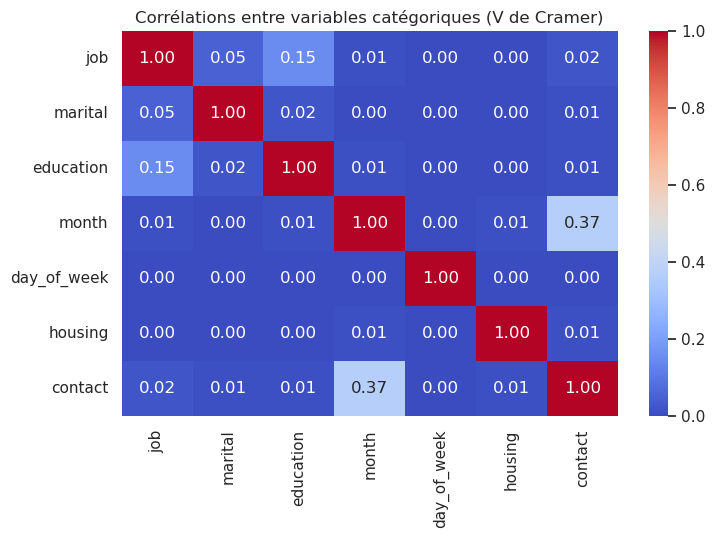

In [17]:

def plot_categorical_correlations(correlation_cat):
    if correlation_cat.empty:
        print("Aucune variable catégorielle à afficher.")
        return
    
    plt.figure(figsize=(8, 5))
    sns.heatmap(correlation_cat, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Corrélations entre variables catégoriques (V de Cramer)")
    plt.show()
    
plot_categorical_correlations(correlation_cat)

on remarque aussi qu'il y'a tres peu de corrélation entre les différentes variables categorielles

In [18]:
# def plot_interactive_heatmap(correlation_matrix, title):
#     fig = px.imshow(correlation_matrix, color_continuous_scale="coolwarm", text_auto=True)
#     fig.update_layout(title=title, width=800, height=600)
#     fig.show()

# plot_interactive_heatmap(correlation_cat, "Corrélations entre variables catégoriques (V de Cramer)")

On passe maintenat a la phase de preprocessing

preprocessing


In [19]:

def encoded_normalized(data):
    """
    Effectue le one-hot encoding sur les variables catégoriques et normalise les variables numériques d'un dataset.

    Args:
        data (pd.DataFrame): Le DataFrame contenant les données à traiter.
        variables (dict): Dictionnaire contenant les listes de colonnes sous les clés :
                          - 'variables_categorielles' : liste des colonnes catégoriques.
                          - 'variables_binaires' : liste des colonnes binaires.
                          - 'variables_numeriques' : liste des colonnes numériques.

    Returns:
        pd.DataFrame: Un DataFrame avec les variables catégoriques encodées, les variables numériques normalisées,
                      et les autres colonnes inchangées.
    """
    # Récupérer les variables catégoriques, binaires et numériques
    variables= classifier_variables(data)
    variables_categorielles = variables.get("variables_categorielles", [])
    variables_binaires = variables.get("variables_binaires", [])
    variables_numeriques = variables.get("variables_numeriques", [])


    # Sélectionner uniquement les colonnes catégoriques et binaires
    data_categorielles = data[variables_categorielles+variables_binaires]

    # Initialiser l'encodeur pour les variables catégoriques
    preproc_ohe = preproc.OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

    # Ajuster et transformer les variables catégoriques
    preproc_ohe.fit(data_categorielles)
    variables_categorielles_ohe = preproc_ohe.transform(data_categorielles)

    # Convertir le résultat en DataFrame
    variables_categorielles_ohe = pd.DataFrame(
        variables_categorielles_ohe,
        columns=preproc_ohe.get_feature_names_out(data_categorielles.columns),
        index=data.index  # Conserver les index originaux
    )

    # Normaliser les variables numériques
    if variables_numeriques:
        scaler = preproc.StandardScaler()
        data_numeriques = data[variables_numeriques]
        data_numeriques_normalisees = scaler.fit_transform(data_numeriques)
        data_numeriques_normalisees = pd.DataFrame(
            data_numeriques_normalisees,
            columns=variables_numeriques,
            index=data.index
        )
    else:
        data_numeriques_normalisees = pd.DataFrame(index=data.index)

    # Supprimer les colonnes catégoriques d'origine et ajouter les colonnes encodées
    data_final = pd.concat([
        variables_categorielles_ohe,
        data_numeriques_normalisees
    ], axis=1)

    return data_final

data_preproc = encoded_normalized(data_model)
data_preproc.head()


,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,contact_telephone,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.568527,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.665715,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,-0.278042,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.013522,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.568527,-0.566106,0.192456,-0.348978,0.649546,0.735109,0.895747,0.713039,0.328423


sampling

In [20]:
X_global = data_preproc                 
# Y_global = target.apply(lambda x: 1 if x == 'yes' else 0)
Y_global = target


# Contexte et Priorités
- **Coût élevé des appels** : Chaque appel téléphonique représente un coût important. 
  Il est crucial d'éviter de cibler des clients qui sont peu susceptibles de souscrire.
- **Taux de conversion** : L’objectif principal est d’augmenter le taux de conversion 
  (proportion de clients contactés qui souscrivent à l’offre).


# Problème clé
Le problème est un **déséquilibre des classes** typique des campagnes de marketing :
- Peu de clients souscrivent à l’offre (classe positive, rare).
- La majorité des clients ne souscrivent pas (classe négative, dominante).

Une métrique comme la précision globale (**accuracy**) peut être trompeuse, car prédire 
"non souscription" pour tous les clients pourrait donner une précision élevée sans 
répondre aux besoins de la banque.


# **Métriques pertinentes**

### **A. Précision (Precision)**  
- **Formule :**  
  \[
  \text{Précision} = \frac{\text{Vrais Positifs (VP)}}{\text{Vrais Positifs (VP)} + \text{Faux Positifs (FP)}}
  \]  
- **Utilité :** Permet de minimiser les faux positifs (par exemple, éviter de contacter des clients non intéressés).  
- **Limite :** Ne tient pas compte des faux négatifs.

---

### **B. Rappel (Recall ou Sensibilité)**  
- **Formule :**  
  \[
  \text{Rappel} = \frac{\text{Vrais Positifs (VP)}}{\text{Vrais Positifs (VP)} + \text{Faux Négatifs (FN)}}
  \]  
- **Utilité :** Maximiser le nombre total de clients souscrivant correctement identifiés (réduction des faux négatifs).  
- **Limite :** Peut entraîner une augmentation des faux positifs.

---

### **C. F1-Score**  
- **Formule :**  
  \[
  \text{F1-Score} = 2 \cdot \frac{\text{Précision} \cdot \text{Rappel}}{\text{Précision} + \text{Rappel}}
  \]  
- **Utilité :** Fournit un équilibre entre précision et rappel. Particulièrement utile pour des classes déséquilibrées.  
- **Interprétation :** Une valeur proche de 1 indique un bon compromis entre précision et rappel.

---

### **D. ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**  
- **Utilité :** Mesure la capacité du modèle à séparer les classes positives et négatives.  
- **Interprétation :**  
  - Une AUC proche de 1 : Le modèle discrimine parfaitement les classes.  
  - Une AUC proche de 0,5 : Le modèle est équivalent à une prédiction aléatoire.


# Recommandation
Pour ce problème :
1. **Précision** : Réduire les faux positifs pour limiter les coûts d’appels inutiles.
2. **F1-Score** : Équilibrer précision et rappel.
3. **ROC-AUC** : Comparer plusieurs modèles pour choisir le meilleur.


## Algorithme supervisé : CART 

In [21]:
#Réorganisation des données 
X = X_global.to_numpy()
Y_global_copy= target.copy().apply(lambda x: 1 if x == 'yes' else 0)

Y = Y_global_copy.to_numpy()

#Sampling en 80% train et 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Fitting

In [22]:
# Initialisation de l'objet
model_CART = DecisionTreeClassifier()  
 
# Train Decision Tree Classifer
model_CART = model_CART.fit(X_train,y_train) 

In [23]:
#Prédiction sur train 
y_pred_train = model_CART.predict(X_train) 

#Métriques 
# 
print("MAE sur train:", metrics.mean_absolute_error(y_train, y_pred_train))
# MSE
print("MSE sur train:", metrics.mean_squared_error(y_train, y_pred_train))
# RMSE
print("RMSE sur train:", metrics.root_mean_squared_error(y_train, y_pred_train)) 

MAE sur train: 0.007321218459929403
MSE sur train: 0.007321218459929403
RMSE sur train: 0.085564118998149


In [24]:
#Prédiction sur test
y_pred_test = model_CART.predict(X_test) 

#Métriques
# MSE
print("MAE sur test:", metrics.mean_absolute_error(y_test, y_pred_test))
# MSE
print("MSE sur test:", metrics.mean_squared_error(y_test, y_pred_test))
# RMSE
print("RMSE sur test:", metrics.root_mean_squared_error(y_test, y_pred_test)) 

MAE sur test: 0.1507386586481893
MSE sur test: 0.1507386586481893
RMSE sur test: 0.3882507677367674


#### Matrice de confusion face a un probleme de classification c'est binaire le plus approprie

matrice de confusion : 
 [[6208  584]
 [ 569  288]]


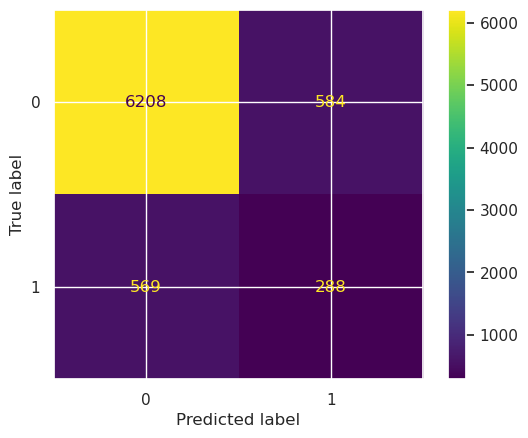

In [25]:
#construction de la matrice de confusion
cm = confusion_matrix(y_test, y_pred_test)
print("matrice de confusion : \n", cm)

# 6. Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_CART.classes_)
_=disp.plot()

etude des métriques

In [26]:
y_prob = model_CART.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive

# 6. Calculer les métriques principales
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_prob)

print("\n### Résumé des métriques ###")
print(f"Précision (Accuracy)   : {accuracy:.2f}")
print(f"Précision (Precision)  : {precision:.2f}")
print(f"Rappel (Recall)        : {recall:.2f}")
print(f"F1-Score               : {f1:.2f}")
print(f"ROC AUC                : {roc_auc:.2f}")


### Résumé des métriques ###
Précision (Accuracy)   : 0.85
Précision (Precision)  : 0.33
Rappel (Recall)        : 0.34
F1-Score               : 0.33
ROC AUC                : 0.63



### Rapport de classification ###
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      6792
           1       0.33      0.34      0.33       857

    accuracy                           0.85      7649
   macro avg       0.62      0.63      0.62      7649
weighted avg       0.85      0.85      0.85      7649



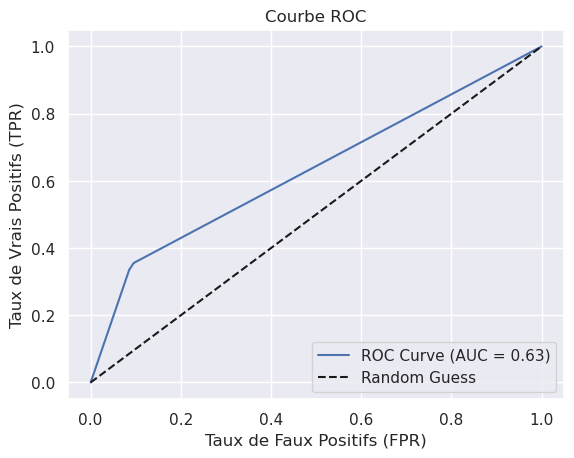

In [27]:
# 7. Rapport de classification complet
print("\n### Rapport de classification ###")
print(classification_report(y_test, y_pred_test))

# 8. Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

#### Que peut on dire de ce modele

## Algorithme supervisé : Gradient Boosting

A ce stade, nous avons vu les différentes étapes pour lancer un algorithme de Machine Learning. Néanmoins, ces étapes ne sont pas suffisantes pour construire un modèle performant.  
En effet, afin de construire un modèle performant le Data Scientist doit agir sur l'apprentissage du modèle. Dans ce qui suit nous :
* Changerons d'algorithme pour utiliser un algorithme plus performant (Gradient Boosting)
* Raliserons un *grid search* sur les paramètres du modèle
* Appliquerons l'apprentissage par validation croisée


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score


In [29]:
#Réorganisation des données 
X = X_global.to_numpy()
Y_global_copy= target.copy().apply(lambda x: 1 if x == 'yes' else 0)
Y = Y_global_copy.to_numpy()

#Sampling en 80% train et 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
# count(np.nan,data=X_train)

#### Fitting avec cross validation

In [30]:
# Définir la grille d'hyperparamètres à rechercher
param_grid = {
    'n_estimators': [100,200,250],
    'learning_rate': [0.5,0.7,0.9],
}

# Nombre de folds pour la validation croisée
num_folds = 5

# Initialisation du modèle GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

In [31]:
# Création de l'objet GridSearchCV pour la recherche sur grille avec validation croisée


# Scorer personnalisé pour la précision avec `average='binary'`
precision_scorer = make_scorer(precision_score, average='binary', zero_division=0)

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42),  # Validation croisée stratifiée avec 5 plis
    scoring=precision_scorer,  # Métrique d'évaluation
    verbose=1,
    n_jobs=-1  # Utiliser tous les cœurs du processeur
)


# Exécution de la recherche sur grille
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres : ", best_params)

# Initialiser le modèle final avec les meilleurs hyperparamètres
best_gb = GradientBoostingClassifier(random_state=42, **best_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Meilleurs hyperparamètres :  {'learning_rate': 0.5, 'n_estimators': 100}


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score

# Scorer personnalisé pour Recall, Precision, et Accuracy
recall_scorer = make_scorer(recall_score, average='binary', zero_division=0)
precision_scorer = make_scorer(precision_score, average='binary', zero_division=0)

# Recall de chaque fold
recall_scores = cross_val_score(best_gb, X_train, y_train, cv=num_folds, scoring=recall_scorer)

# Affiche les scores pour chaque fold
print("Recall pour chaque fold :")
for i, score in enumerate(recall_scores):
    print(f"Fold {i + 1}: {score:.4f}")

# Accuracy de chaque fold (pas besoin de `average`, car c'est une métrique globale)
accuracy_scores = cross_val_score(best_gb, X_train, y_train, cv=num_folds, scoring='accuracy')

# Affiche les scores pour chaque fold
print("\nAccuracy pour chaque fold :")
for i, score in enumerate(accuracy_scores):
    print(f"Fold {i + 1}: {score:.4f}")

# Precision de chaque fold
precision_scores = cross_val_score(best_gb, X_train, y_train, cv=num_folds, scoring=precision_scorer)

# Affiche les scores pour chaque fold
print("\nPrecision pour chaque fold :")
for i, score in enumerate(precision_scores):
    print(f"Fold {i + 1}: {score:.4f}")

# Afficher les moyennes des métriques
print("\n--- Moyennes des scores ---")
print(f"Recall moyen : {recall_scores.mean():.4f}")
print(f"Accuracy moyen : {accuracy_scores.mean():.4f}")
print(f"Precision moyen : {precision_scores.mean():.4f}")


Recall pour chaque fold :
Fold 1: 0.2625
Fold 2: 0.2394
Fold 3: 0.2878
Fold 4: 0.2687
Fold 5: 0.2702

Accuracy pour chaque fold :
Fold 1: 0.8997
Fold 2: 0.8946
Fold 3: 0.8992
Fold 4: 0.8987
Fold 5: 0.9003

Precision pour chaque fold :
Fold 1: 0.6172
Fold 2: 0.5621
Fold 3: 0.5976
Fold 4: 0.6000
Fold 5: 0.6195

--- Moyennes des scores ---
Recall moyen : 0.2657
Accuracy moyen : 0.8985
Precision moyen : 0.5993


In [33]:
# Entraîner le modèle final sur la base entière
best_gb.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = best_gb.predict(X_test)
y_pred_proba = best_gb.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive

# Calculer les métriques principales
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Afficher les métriques calculées
print("----- Résultats des métriques -----")
print(f"Exactitude (Accuracy) : {accuracy:.4f}")
print(f"Rappel (Recall) : {recall:.4f}")
print(f"Précision (Precision) : {precision:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC : {roc_auc:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :")
print(cm)

# Rapport de classification détaillé
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

----- Résultats des métriques -----
Exactitude (Accuracy) : 0.8997
Rappel (Recall) : 0.2653
Précision (Precision) : 0.6158
F1-Score : 0.3708
ROC-AUC : 0.8000

Matrice de confusion :
[[6656  141]
 [ 626  226]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      6797
           1       0.62      0.27      0.37       852

    accuracy                           0.90      7649
   macro avg       0.76      0.62      0.66      7649
weighted avg       0.88      0.90      0.88      7649



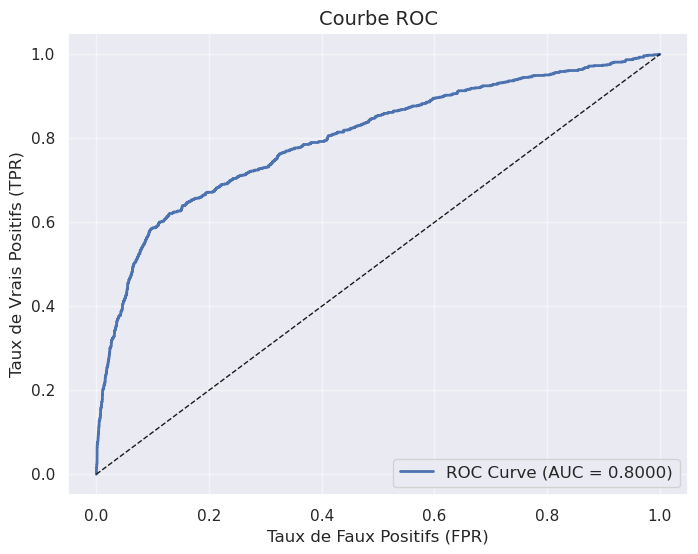

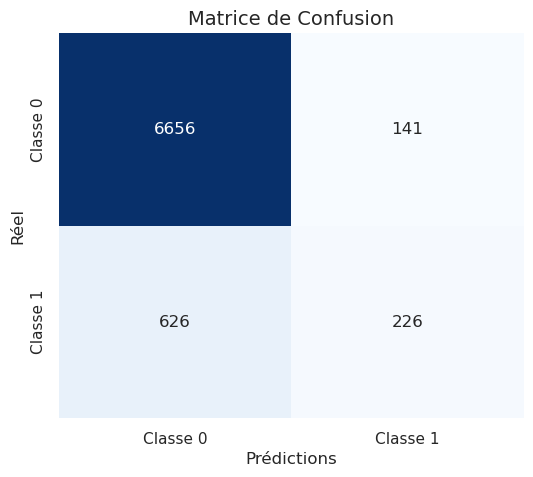

In [34]:
# Calcul de l'aire sous la courbe ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# --- Courbe ROC ---
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  # Ligne de base
plt.title("Courbe ROC", fontsize=14)
plt.xlabel("Taux de Faux Positifs (FPR)", fontsize=12)
plt.ylabel("Taux de Vrais Positifs (TPR)", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# --- Matrice de confusion ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Classe 0", "Classe 1"], 
            yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion", fontsize=14)
plt.xlabel("Prédictions", fontsize=12)
plt.ylabel("Réel", fontsize=12)
plt.show()


##### QUE PENSEZ DE CE MODELE?

## Algorithme supervisé : Random Forest  

A ce stade, nous avons vu les différentes étapes pour lancer un algorithme de Machine Learning. Néanmoins, ces étapes ne sont pas suffisantes pour construire un modèle performant.  
En effet, afin de construire un modèle performant le Data Scientist doit agir sur l'apprentissage du modèle. Dans ce qui suit nous :
* Changerons d'algorithme pour utiliser un algorithme plus performant (Random Forest)
* Raliserons un *grid search* sur les paramètres du modèle
* Appliquerons l'apprentissage par validation croisée


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    accuracy_score
)

In [36]:
#Réorganisation des données 
X = X_global.to_numpy()
Y_global_copy= target.copy().apply(lambda x: 1 if x == 'yes' else 0)
Y = Y_global_copy.to_numpy()

#Sampling en 80% train et 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Fitting avec Cross-Validation

In [37]:
# Supposons que vous ayez des données d'entraînement X_train et y_train

# Définir la grille d'hyperparamètres à rechercher
param_grid = {
    'n_estimators': [60,65,70 ,75],
    'max_depth': [1,2,3,4],
    'min_samples_split': [5,8,10,11,13, 14,15]
}
# Nombre de folds pour la validation croisée
num_folds = 5


In [38]:
# Initialisation du modèle RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Scorer personnalisé pour la précision avec `average='binary'`
precision_scorer = make_scorer(precision_score, average='binary', zero_division=0)

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=KFold(n_splits=num_folds, shuffle=True, random_state=42),  #
    scoring=precision_scorer,
    verbose=1,
    n_jobs=-1
)

# Entraîner le GridSearchCV
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres : ", best_params)

Fitting 5 folds for each of 112 candidates, totalling 560 fits
Meilleurs hyperparamètres :  {'max_depth': 2, 'min_samples_split': 5, 'n_estimators': 60}


In [39]:
# Initialiser le modèle final avec les meilleurs hyperparamètres
best_rf = RandomForestClassifier(random_state=42, **best_params)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score

# Scorer personnalisé pour Recall, Precision, et Accuracy
recall_scorer = make_scorer(recall_score, average='binary', zero_division=0)
precision_scorer = make_scorer(precision_score, average='binary', zero_division=0)

# Recall de chaque fold
recall_scores = cross_val_score(best_rf, X_train, y_train, cv=num_folds, scoring=recall_scorer)

# Affiche les scores pour chaque fold
print("Recall pour chaque fold :")
for i, score in enumerate(recall_scores):
    print(f"Fold {i + 1}: {score:.4f}")

# Accuracy de chaque fold (pas besoin de `average`, car c'est une métrique globale)
accuracy_scores = cross_val_score(best_rf, X_train, y_train, cv=num_folds, scoring='accuracy')

# Affiche les scores pour chaque fold
print("\nAccuracy pour chaque fold :")
for i, score in enumerate(accuracy_scores):
    print(f"Fold {i + 1}: {score:.4f}")

# Precision de chaque fold
precision_scores = cross_val_score(best_rf, X_train, y_train, cv=num_folds, scoring=precision_scorer)

# Affiche les scores pour chaque fold
print("\nPrecision pour chaque fold :")
for i, score in enumerate(precision_scores):
    print(f"Fold {i + 1}: {score:.4f}")

# Afficher les moyennes des métriques
print("\n--- Moyennes des scores ---")
print(f"Recall moyen : {recall_scores.mean():.4f}")
print(f"Accuracy moyen : {accuracy_scores.mean():.4f}")
print(f"Precision moyen : {precision_scores.mean():.4f}")


Recall pour chaque fold :
Fold 1: 0.0029
Fold 2: 0.0015
Fold 3: 0.0029
Fold 4: 0.0118
Fold 5: 0.0029

Accuracy pour chaque fold :
Fold 1: 0.8889
Fold 2: 0.8887
Fold 3: 0.8892
Fold 4: 0.8900
Fold 5: 0.8892

Precision pour chaque fold :
Fold 1: 0.6667
Fold 2: 0.3333
Fold 3: 1.0000
Fold 4: 0.8889
Fold 5: 1.0000

--- Moyennes des scores ---
Recall moyen : 0.0044
Accuracy moyen : 0.8892
Precision moyen : 0.7778


In [41]:
# Entraîner le modèle final sur toute la base
best_rf.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive

# Calculer les métriques principales
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Afficher les métriques calculées
print("----- Résultats des métriques -----")
print(f"Exactitude (Accuracy) : {accuracy:.4f}")
print(f"Rappel (Recall) : {recall:.4f}")
print(f"Précision (Precision) : {precision:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC : {roc_auc:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :")
print(cm)

# Rapport de classification détaillé
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

----- Résultats des métriques -----
Exactitude (Accuracy) : 0.8884
Rappel (Recall) : 0.0047
Précision (Precision) : 0.8000
F1-Score : 0.0093
ROC-AUC : 0.7747

Matrice de confusion :
[[6791    1]
 [ 853    4]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6792
           1       0.80      0.00      0.01       857

    accuracy                           0.89      7649
   macro avg       0.84      0.50      0.48      7649
weighted avg       0.88      0.89      0.84      7649



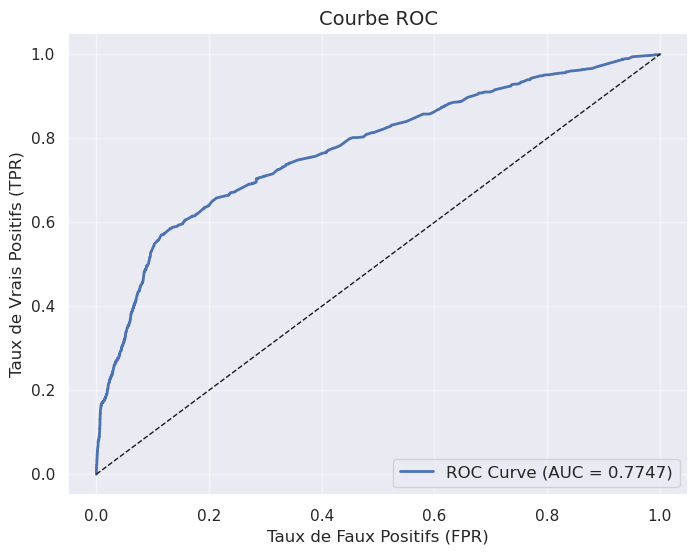

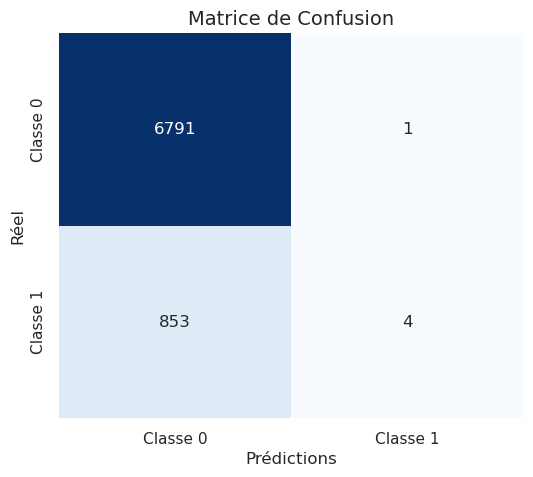

In [42]:
# Calcul de l'aire sous la courbe ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# --- Courbe ROC ---
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  # Ligne de base
plt.title("Courbe ROC", fontsize=14)
plt.xlabel("Taux de Faux Positifs (FPR)", fontsize=12)
plt.ylabel("Taux de Vrais Positifs (TPR)", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# --- Matrice de confusion ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Classe 0", "Classe 1"], 
            yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion", fontsize=14)
plt.xlabel("Prédictions", fontsize=12)
plt.ylabel("Réel", fontsize=12)
plt.show()


In [43]:
#Réorganisation des données 
X = X_global.to_numpy()
Y_global_copy= target.copy().apply(lambda x: 1 if x == 'yes' else 0)
Y = Y_global_copy.to_numpy()

#Sampling en 80% train et 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
# count(np.nan,data=X_train)

### Fitting avec *Oversampling*

In [44]:
#Observation de la distribution sur Y_train
df = pd.DataFrame(y_train, columns = ["y"])
fig = px.histogram(df, 
                   x="y",
                  title="Distribution de la variable Y_train")
fig.show()

In [45]:
#Oversampling
# Appliquer le suréchantillonnage à la classe minoritaire
sampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

In [46]:
#Observation de la distribution sur Y_train
df = pd.DataFrame(y_train_resampled, columns = ["y"])
fig = px.histogram(df, 
                   x="y",
                  title="Distribution de la variable Y_train_resampled")
fig.show()

#### Fitting sur le nouvel échantillon

In [47]:
# Définir la grille d'hyperparamètres à rechercher
param_grid = {
    'n_estimators': [60,65,70 ,75],
    'max_depth': [1,2,3,4],
    'min_samples_split': [5,8,10,11,13, 14,15]
}
# Nombre de folds pour la validation croisée
num_folds = 5



In [48]:
# Initialisation du modèle RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Scorer personnalisé pour la précision avec `average='binary'`
# precision_scorer = make_scorer(precision_score, average='binary', zero_division=0)

# Création de l'objet GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=KFold(n_splits=num_folds, shuffle=True, random_state=42),  # Validation croisée stratifiée avec 5 plis
    scoring='precision',
    n_jobs=-1
)

# Entraîner le GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Afficher les meilleurs hyperparamètres
best_params = grid_search.best_params_
print("Meilleurs hyperparamètres : ", best_params)

Meilleurs hyperparamètres :  {'max_depth': 1, 'min_samples_split': 5, 'n_estimators': 65}


In [49]:
# Initialiser le modèle final avec les meilleurs hyperparamètres
best_rf = RandomForestClassifier(random_state=42, **best_params)

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score

# Scorer personnalisé pour Recall, Precision, et Accuracy
recall_scorer = make_scorer(recall_score, average='binary', zero_division=0)
precision_scorer = make_scorer(precision_score, average='binary', zero_division=0)

# Recall de chaque fold
recall_scores = cross_val_score(best_rf, X_train_resampled, y_train_resampled, cv=num_folds, scoring=recall_scorer)

# Affiche les scores pour chaque fold
print("Recall pour chaque fold :")
for i, score in enumerate(recall_scores):
    print(f"Fold {i + 1}: {score:.4f}")

# Accuracy de chaque fold (pas besoin de `average`, car c'est une métrique globale)
accuracy_scores = cross_val_score(best_rf, X_train_resampled, y_train_resampled, cv=num_folds, scoring='accuracy')

# Affiche les scores pour chaque fold
print("\nAccuracy pour chaque fold :")
for i, score in enumerate(accuracy_scores):
    print(f"Fold {i + 1}: {score:.4f}")

# Precision de chaque fold
precision_scores = cross_val_score(best_rf, X_train_resampled, y_train_resampled, cv=num_folds, scoring=precision_scorer)

# Affiche les scores pour chaque fold
print("\nPrecision pour chaque fold :")
for i, score in enumerate(precision_scores):
    print(f"Fold {i + 1}: {score:.4f}")

# Afficher les moyennes des métriques
print("\n--- Moyennes des scores ---")
print(f"Recall moyen : {recall_scores.mean():.4f}")
print(f"Accuracy moyen : {accuracy_scores.mean():.4f}")
print(f"Precision moyen : {precision_scores.mean():.4f}")


Recall pour chaque fold :
Fold 1: 0.6254
Fold 2: 0.5493
Fold 3: 0.5546
Fold 4: 0.6164
Fold 5: 0.6234

Accuracy pour chaque fold :
Fold 1: 0.7260
Fold 2: 0.7220
Fold 3: 0.7229
Fold 4: 0.7201
Fold 5: 0.7269

Precision pour chaque fold :
Fold 1: 0.7829
Fold 2: 0.8393
Fold 3: 0.8359
Fold 4: 0.7777
Fold 5: 0.7862

--- Moyennes des scores ---
Recall moyen : 0.5938
Accuracy moyen : 0.7236
Precision moyen : 0.8044


In [51]:
# Entraîner le modèle final sur toute la base
best_rf.fit(X_train_resampled, y_train_resampled)

# Faire des prédictions sur l'ensemble de test
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive

# Calculer les métriques principales
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Afficher les métriques calculées
print("----- Résultats des métriques -----")
print(f"Exactitude (Accuracy) : {accuracy:.4f}")
print(f"Rappel (Recall) : {recall:.4f}")
print(f"Précision (Precision) : {precision:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC : {roc_auc:.4f}")

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :")
print(cm)

# Rapport de classification détaillé
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

----- Résultats des métriques -----
Exactitude (Accuracy) : 0.7987
Rappel (Recall) : 0.6197
Précision (Precision) : 0.3028
F1-Score : 0.4068
ROC-AUC : 0.7765

Matrice de confusion :
[[5581 1216]
 [ 324  528]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      6797
           1       0.30      0.62      0.41       852

    accuracy                           0.80      7649
   macro avg       0.62      0.72      0.64      7649
weighted avg       0.87      0.80      0.83      7649



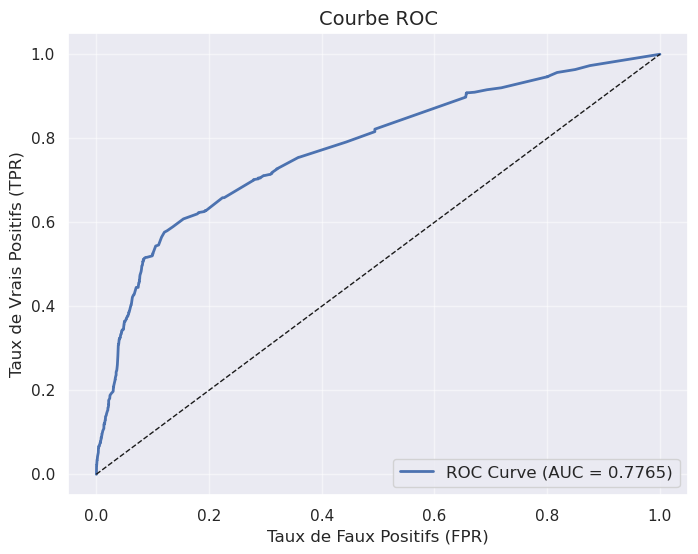

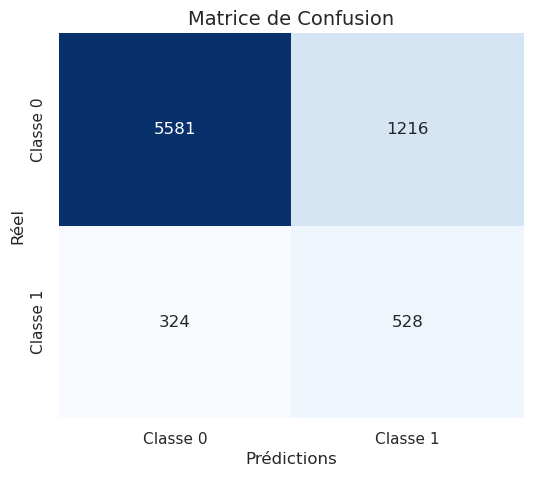

In [52]:
# Calcul de l'aire sous la courbe ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# --- Courbe ROC ---
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  # Ligne de base
plt.title("Courbe ROC", fontsize=14)
plt.xlabel("Taux de Faux Positifs (FPR)", fontsize=12)
plt.ylabel("Taux de Vrais Positifs (TPR)", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# --- Matrice de confusion ---
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Classe 0", "Classe 1"], 
            yticklabels=["Classe 0", "Classe 1"])
plt.title("Matrice de Confusion", fontsize=14)
plt.xlabel("Prédictions", fontsize=12)
plt.ylabel("Réel", fontsize=12)
plt.show()
